# Enclosed luminosity profiles for helium core burning stars 

Figure 8.8 from *Stellar Structure & Evolution* by Pinsonneault & Ryden, Cambridge University Press.

Plot of enclosed luminosity versus mass for stars that have started core helium burning. Initial stellar
masses are 1, 3, 10, and 30 M<sub>sun</sub>. 

Data are from models computed using MESA (http://mesa.sourceforge.net).

In [9]:
import os
import sys
import math
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)
warnings.filterwarnings('ignore',category=DeprecationWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.

In [10]:
plotFile = 'Fig8_8.png' 

# graphic aspect ratio = width/height

aspect = 4.0/3.0

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 12
labelFontSize = 8
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Data Files

Data are mass in M<sub>sun</sub> and luminosity in L<sub>sun</sub> for stars of masses 1,3,10, and 
30 M<sub>sun</sub> on the zero-age helium burning (zahb) sequence. These are extracted in CSV format from
the output of MESA models.

The CSV file reading is tricky as to pack all this into one CSV, each pair of density and temperature for
each data set has different numbers of rows.  The pandas read_csv() format reads in everything up to the
maximum number of rows across all data, and then fills in blanks as NaNs (not-a-number).  The "trick" here
is to use the numpy.isfinite() method to restrict attention to the non-blank (non-NaN) data in each vector.

Line type list `ltypes` is the same as the $\rho-T$ diagrams for the ZAMS in Figure 6.8.


In [11]:
dataDir = 'ZAHB'

dataFile = f'{dataDir}/He_ML_zahb.csv'

data = pd.read_csv(dataFile)

Msun = {}
Lsun = {}

massList = ['1','3','10','30']
ltypes = [(0,()),(0,(10,2)),(0, (3, 5, 1, 5)),(0,(4,2))]

# zero-age helium burning M-L data

for mass in massList:
    m = np.array(data[f'M_{mass}_zahb'])
    l = np.array(data[f'L_{mass}_zahb'])
    
    Msun[mass] = m[np.isfinite(m)]
    Lsun[mass] = l[np.isfinite(l)]

# enclosed mass limits

minM = 0.002 # Msun
maxM = 32.0

# enclosed luminosity limits

minL = 1.    # Lsun
maxL = 1.0e6 

## Figure 8.8

Plot one panel, log-log axes, with different line types (see also Figure 6.8):
 * 1 Msun - solid line
 * 3 Msun - long-dashed line
 * 10 Msun - dash-dot line
 * 30 Msun - short-dashed line


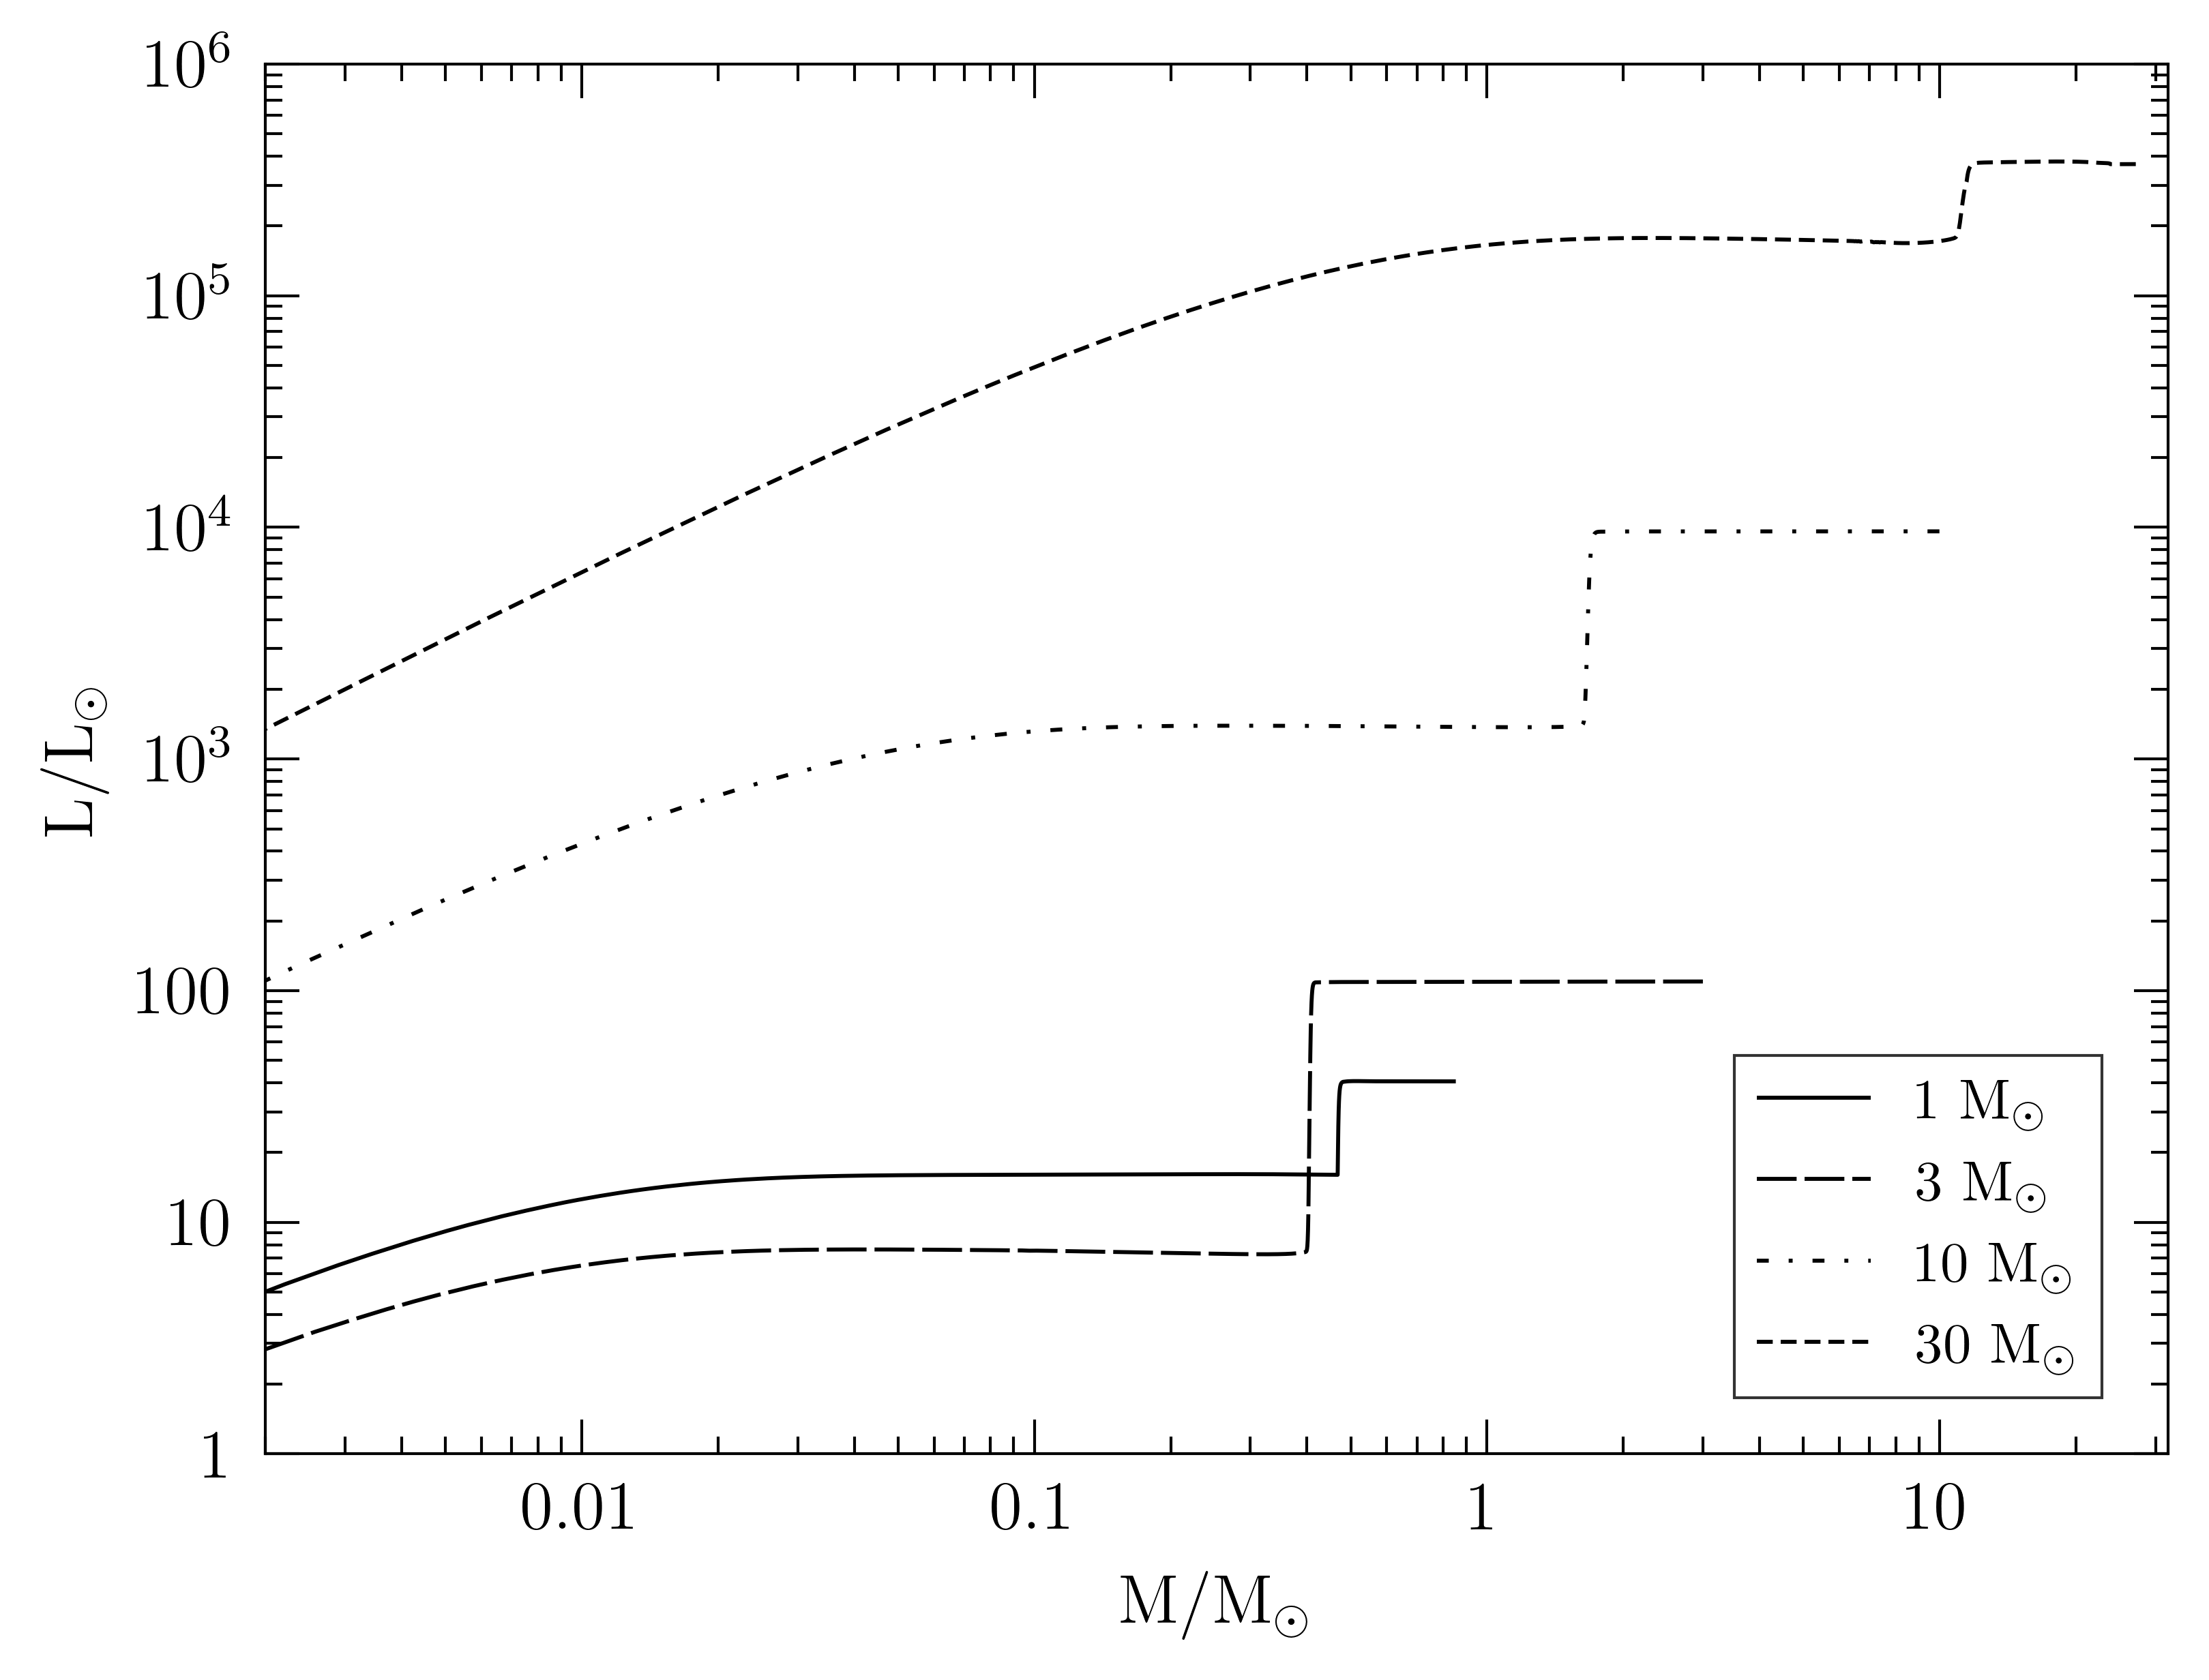

In [12]:
fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)
    
ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top='on',right='on')
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top='on',right='on')

# Limits

ax.set_xlim(minM,maxM)
ax.set_xscale('log')
ax.set_xlabel(r'M/M$_\odot$',fontsize=axisFontSize)
ax.set_xticks([1e-2,0.1,1,10])
ax.set_xticklabels([r'0.01','0.1','1','10'])

ax.set_ylim(minL,maxL)
ax.set_yscale('log')
ax.set_ylabel(r'L/L$_\odot$',fontsize=axisFontSize)
ax.set_yticks([1,10,100,1e3,1e4,1e5,1e6])
ax.set_yticklabels(['1','10','100',r'10$^3$',r'10$^4$',r'10$^5$',r'10$^6$'])

ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top=True,right=True)
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top=True,right=True)

for i in range(len(massList)):
    mass = massList[i]
    ax.plot(Msun[mass],Lsun[mass],ls=ltypes[i],color='black',lw=0.7,label=rf'{mass} M$_\odot$',zorder=9)
    
legend = ax.legend(fontsize=10,loc='lower right',fancybox=False,edgecolor='black',bbox_to_anchor=(0.98,0.02))
frame = legend.get_frame()
frame.set_linewidth(0.5)

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')